# Explore Images

## 1. Get list of thumbnail images

In [124]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from deepface import DeepFace
from retinaface import RetinaFace
import IPython.display as ipd
pd.set_option('display.max_columns', 500)

In [15]:
thumbnails = glob('thumbnails/*.jpg')

(-0.5, 479.5, 359.5, -0.5)

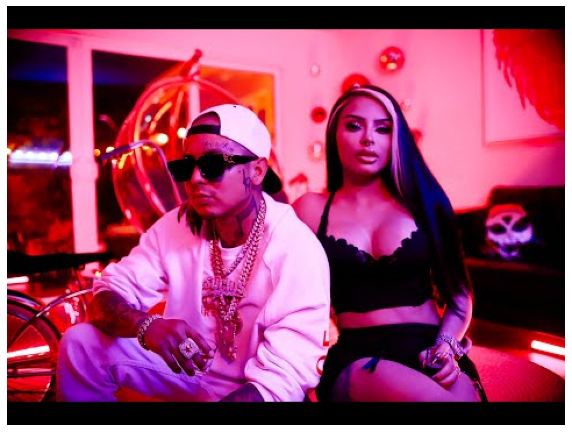

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(thumbnails[200]))
ax.axis('off')

# Face Analysis
1. Is there a face?
2. Detect things about the faces:
    1. Gender
    2. Age
    3. Race
    4. Emotion

In [87]:
img_path = thumbnails[150]

In [189]:
%load_ext lab_black

In [190]:
def detect_faces(img_path):
    video_id = img_path[11:-4]
    try:
        obj = DeepFace.analyze(
            img_path=img_path,
            detector_backend="retinaface",
            actions=["age", "gender", "race", "emotion"],
            prog_bar=False,
            enforce_detection=True,
        )
    except ValueError:
        return pd.DataFrame()
    df_img = pd.json_normalize(obj)
    df_img["img_path"] = img_path
    df_img["video_id"] = video_id
    rf_results = RetinaFace.detect_faces(img_path)
    df_img["n_faces"] = len(rf_results)
    df_img2 = pd.json_normalize(rf_results)
    df_img = df_img.merge(df_img2, left_index=True, right_index=True)
    return df_img

In [191]:
dfs = []
for img_path in thumbnails[:50]:
    df_img = detect_faces(img_path)
    dfs.append(df_img)

1/1 [==============================] - 0s 19ms/step


In [185]:
df = pd.concat(dfs).reset_index(drop=True)

In [192]:
df["n_faces"].value_counts()

1     20
2      8
3      2
6      1
5      1
4      1
12     1
Name: n_faces, dtype: int64

# 12 Faces? That's Sus

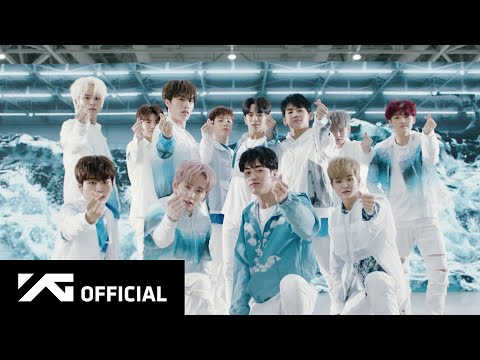

In [198]:
# No it's legit
ipd.Image("thumbnails/_hFarg-Obuc.jpg")

# Saddest Person in the world

In [207]:
df["dominant_emotion"].value_counts()

neutral     14
happy        7
angry        5
surprise     3
fear         3
sad          2
Name: dominant_emotion, dtype: int64

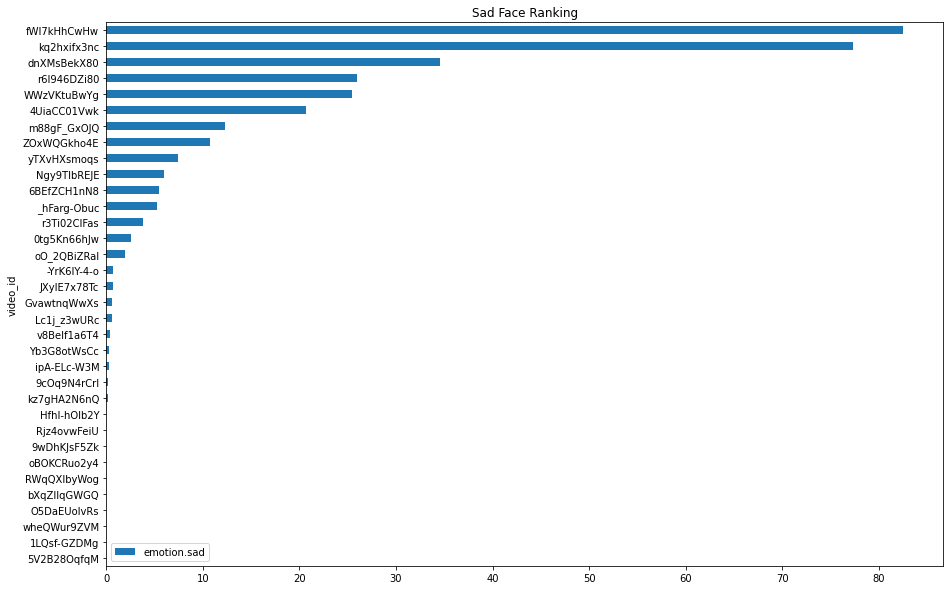

In [208]:
df.set_index("video_id").sort_values("emotion.sad")[["img_path", "emotion.sad"]].plot(
    kind="barh", figsize=(15, 10), title="Sad Face Ranking"
)
plt.show()

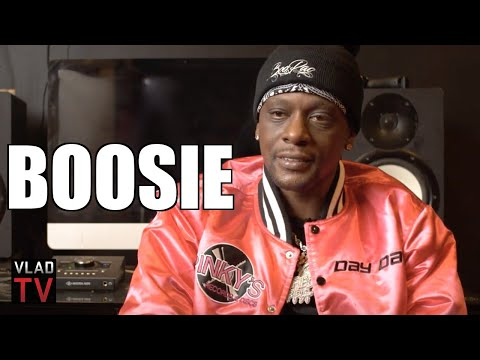

In [210]:
sad = df.sort_values("emotion.sad", ascending=False)["img_path"].values[0]
ipd.Image(sad)

In [215]:
import seaborn as sns

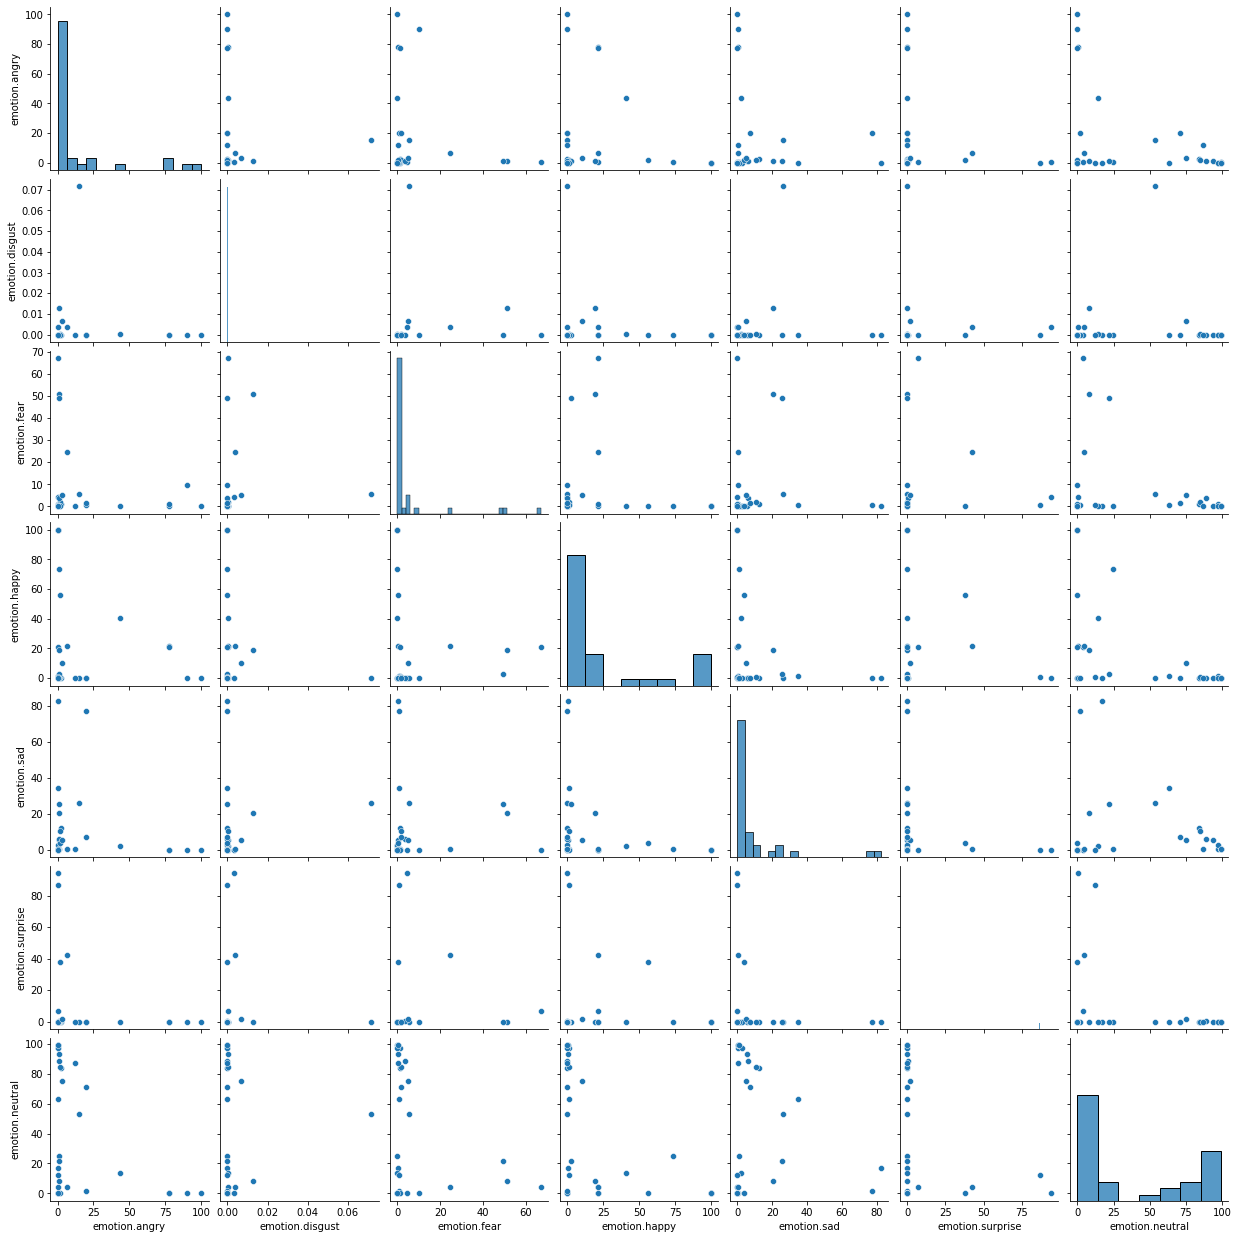

In [219]:
sns.pairplot(
    df,
    vars=[
        "emotion.angry",
        "emotion.disgust",
        "emotion.fear",
        "emotion.happy",
        "emotion.sad",
        "emotion.surprise",
        "emotion.neutral",
    ],
)

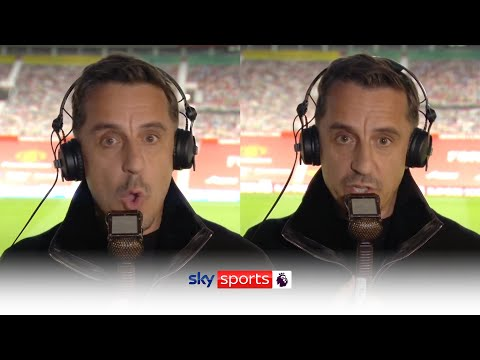

In [229]:
sad = df.sort_values("emotion.surprise", ascending=False)["img_path"].values[4]
ipd.Image(sad)